In [1]:
# Libraries and Setup

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [7]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [9]:
from sklearn.cluster import KMeans

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
import matplotlib.pyplot as plt

In [12]:
# Simulated user behavior dataset

In [13]:
data = {
    'user_id': [1, 2, 3, 4, 5],
    'likes_per_day': [10, 20, 5, 30, 25],
    'comments_per_day': [5, 10, 2, 8, 7],
    'time_spent_minutes': [120, 300, 50, 400, 250],
    'shares_per_day': [2, 5, 1, 6, 4]
}

In [17]:
df = pd.DataFrame(data)

In [18]:
df

,user_id,likes_per_day,comments_per_day,time_spent_minutes,shares_per_day
0,1,10,5,120,2
1,2,20,10,300,5
2,3,5,2,50,1
3,4,30,8,400,6
4,5,25,7,250,4


In [19]:
# Normalize the Data

In [20]:
# Normalize the features for clustering analysis.

In [21]:
scaler = StandardScaler()

In [22]:
scaler

StandardScaler()

In [23]:
features = ['likes_per_day', 'comments_per_day', 'time_spent_minutes', 'shares_per_day']

In [24]:
features

['likes_per_day', 'comments_per_day', 'time_spent_minutes', 'shares_per_day']

In [25]:
df_scaled = scaler.fit_transform(df[features])

In [26]:
df_scaled

array([[-0.86266219, -0.5132649 , -0.82990465, -0.86266219],
       [ 0.21566555,  1.31982404,  0.60646878,  0.75482941],
       [-1.40182605, -1.61311827, -1.38849431, -1.40182605],
       [ 1.29399328,  0.58658846,  1.40445402,  1.29399328],
       [ 0.75482941,  0.21997067,  0.20747616,  0.21566555]])

In [27]:
# Clustering (Segmentation)

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [29]:
df['cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/Caskroom/miniconda/base/envs/py312/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [30]:
df

,user_id,likes_per_day,comments_per_day,time_spent_minutes,shares_per_day,cluster
0,1,10,5,120,2,2
1,2,20,10,300,5,0
2,3,5,2,50,1,1
3,4,30,8,400,6,0
4,5,25,7,250,4,0


In [32]:
for cluster_id in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_id]
    

In [33]:
print(f"Cluster {cluster_id} Insights:")


Cluster 1 Insights:


In [34]:
print(cluster_data.describe())

       user_id  likes_per_day  comments_per_day  time_spent_minutes  \
count      1.0            1.0               1.0                 1.0   
mean       3.0            5.0               2.0                50.0   
std        NaN            NaN               NaN                 NaN   
min        3.0            5.0               2.0                50.0   
25%        3.0            5.0               2.0                50.0   
50%        3.0            5.0               2.0                50.0   
75%        3.0            5.0               2.0                50.0   
max        3.0            5.0               2.0                50.0   

       shares_per_day  cluster  
count             1.0      1.0  
mean              1.0      1.0  
std               NaN      NaN  
min               1.0      1.0  
25%               1.0      1.0  
50%               1.0      1.0  
75%               1.0      1.0  
max               1.0      1.0  


In [37]:
# Recommendations Based on Clusters

In [38]:
recommendations = {
    0: "Engage with users more actively by showing content from diverse creators.",
    1: "Focus on promoting trending content since these users spend more time on the platform.",
    2: "Encourage interactions by suggesting users to comment more frequently."
}

In [39]:
df['recommendation'] = df['cluster'].map(recommendations)

In [40]:
print("User Recommendations:")

User Recommendations:


In [41]:
print(df[['user_id', 'cluster', 'recommendation']])

   user_id  cluster                                     recommendation
0        1        2  Encourage interactions by suggesting users to ...
1        2        0  Engage with users more actively by showing con...
2        3        1  Focus on promoting trending content since thes...
3        4        0  Engage with users more actively by showing con...
4        5        0  Engage with users more actively by showing con...


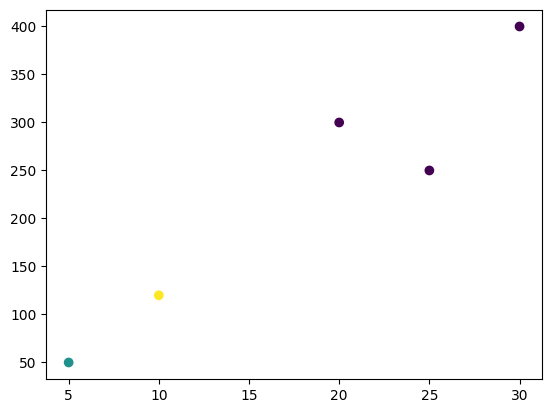

In [42]:
plt.scatter(df['likes_per_day'], df['time_spent_minutes'], c=df['cluster'], cmap='viridis')

Text(0.5, 1.0, 'User Behavior Clustering')

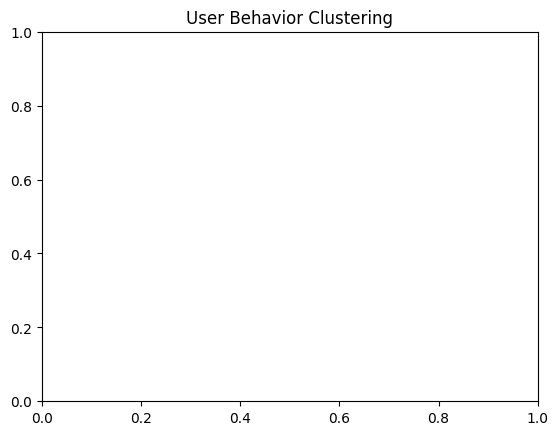

In [43]:
plt.title("User Behavior Clustering")


Text(0.5, 0, 'Likes per Day')

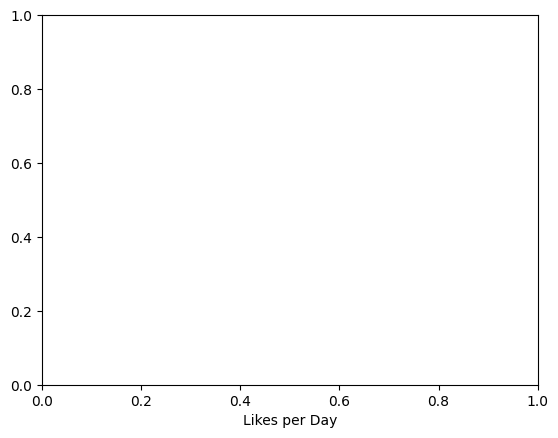

In [44]:
plt.xlabel("Likes per Day")


Text(0, 0.5, 'Time Spent (Minutes)')

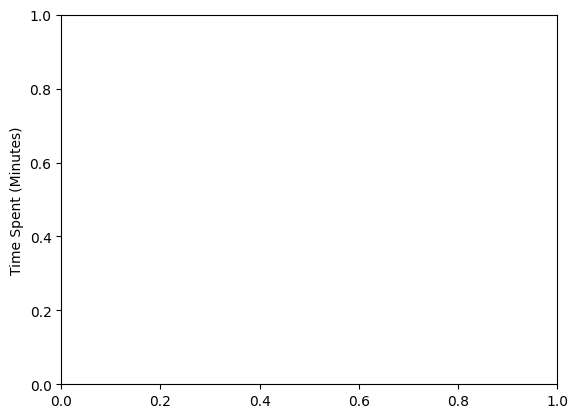

In [45]:
plt.ylabel("Time Spent (Minutes)")


In [46]:
plt.show()